In [1]:
#Bibliotecas utilizadas

import requests
import bs4 as bs
import numpy as np
import pandas as pd
import random
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from random import sample

In [2]:
# Observação: A cada execução um novo conjunto de porfolios sera gerado.
## Com a desativação do gerador aleatorio, um mesmo porfolio aparecera para o periodo de tempo determinado.
### Sendo esse o melhor do conjunto de ativos.

In [3]:
# Webscraping de dados que compoem o indice

company_name = []
company_ticker = []

url = 'https://www.investopedia.com/terms/d/djia.asp'
html = requests.get(url)
soup = bs.BeautifulSoup(html.text)
table =  soup.find('table', {'class':'mntl-sc-block-table__table'})
odd_rows = table.findAll('tr')[2:]

for i in odd_rows:
    name = i.findAll('td')[0].text
    ticker = i.findAll('td')[1].text
    company_name.append(name)        
    company_ticker.append(ticker)
    
generator = pd.DataFrame({'Name': company_name, 'Ticker': company_ticker})

labels = generator['Name']
assets = generator['Ticker']

generator

,Name,Ticker
0,3M,MMM
1,American Express,AXP
2,Amgen,AMGN
3,Apple Inc.,AAPL
4,Boeing,BA
5,Caterpillar,CAT
6,Chevron,CVX
7,Cisco Systems,CSCO
8,The Coca-Cola Company,KO
9,Dow Inc.,DOW


In [4]:
# Gerador de aleatorio de ações
## Para desativar o gerador aleatorio, comentar as linhas deste quadro

number = 10
raffle = sample(range(30), number)
raffle.sort()

# Ações escolhidas
generator = generator.loc[raffle]
generator

,Name,Ticker
0,3M,MMM
11,The Home Depot,HD
12,Honeywell,HON
13,IBM,IBM
17,McDonald's,MCD
18,Merck & Co.,MRK
20,NIKE,NKE
22,Salesforce,CRM
27,Walmart,WMT
29,The Walt Disney Company,DIS


In [5]:
#Coleta de dados historicos no periodo de 2018 a final de 2020

start0 = '02/01/2018'
end0 = '31/12/2020'

prices_df = pd.DataFrame()

for a,b in zip(labels, assets):
    prices_df[a] = wb.DataReader(b, data_source = 'yahoo', start = start0, end = end0)['Adj Close']
    
prices_df2 = pd.DataFrame()

In [6]:
#Coleta de dados historicos para a validação do modelo partido de 2020 a presente

name = ['Dow Jones']
index = ['^DJI']

start1 = '02/01/2020'
end1 = '31/12/2021' 

benchmark = pd.DataFrame()

for  a,b in zip(index, name):
    benchmark[b] = wb.DataReader(a, data_source = 'yahoo', start = start1, end = end1)['Adj Close']
    
for a,b in zip(labels, assets):
    prices_df2[a] = wb.DataReader(b, data_source = 'yahoo', start = start1, end = end1)['Adj Close']

In [7]:
# Simpleficando o banco de dados com os ativos escolhidos
## Para desativar o gerador aleatorio, comentar as linhas deste quadro

prices_df = prices_df.iloc[:, raffle]
prices_df2 = prices_df2.iloc[:, raffle]

<AxesSubplot:xlabel='Date'>

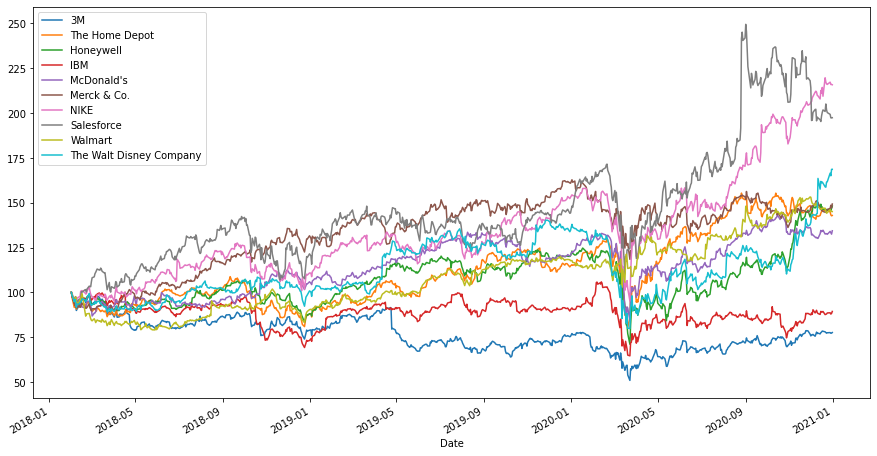

In [8]:
# Imagem dos retornos historicos dos ativos escolhidos

(prices_df / prices_df.iloc[0] * 100).plot(figsize=(15,8))

In [9]:
# Calculando retorno medio, retorno anual e covariancia

returns = (prices_df/prices_df.shift(1)) - 1
ret_anual = returns.mean()*250
cov_anual = returns.cov()*250

In [10]:
# Gerando combinações de porfolio com diferentes pesos para 20 mil combinações

retorno_carteira, peso_acoes, volatilidade_carteira, sharpe_ratio = [],[],[],[]

acoes = prices_df.columns

numero_acoes = prices_df.shape[1]
numero_carteiras = 20000
np.random.seed(42)

for cada_carteira in range (numero_carteiras):
    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    retorno = np.dot(peso, ret_anual)
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))
    sharpe = retorno/volatilidade
    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso)
    
carteira = {'Retorno': retorno_carteira, 'Volatilidade': volatilidade_carteira, 'Sharpe Ratio': sharpe_ratio}

for contar, acao in enumerate(acoes):
    carteira[acao] = [Peso[contar] for Peso in peso_acoes]

carteira = pd.DataFrame(carteira)

colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao for acao in acoes]
carteira = carteira[colunas]
carteira

,Retorno,Volatilidade,Sharpe Ratio,3M,The Home Depot,Honeywell,IBM,McDonald's,Merck & Co.,NIKE,Salesforce,Walmart,The Walt Disney Company
0,0.167840,0.238457,0.703857,0.072008,0.182782,0.140731,0.115096,0.029996,0.029991,0.011167,0.166529,0.115569,0.136132
1,0.192843,0.238621,0.808157,0.005208,0.245380,0.210602,0.053720,0.046000,0.046400,0.076971,0.132760,0.109279,0.073679
2,0.142475,0.214108,0.665437,0.152815,0.034840,0.072966,0.091502,0.113907,0.196104,0.049870,0.128434,0.147960,0.011601
3,0.122573,0.213898,0.573046,0.119297,0.033484,0.012773,0.186322,0.189611,0.158736,0.059814,0.019179,0.134355,0.086428
4,0.154011,0.223179,0.690082,0.030166,0.122400,0.008500,0.224769,0.063966,0.163765,0.077050,0.128552,0.135138,0.045693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.171183,0.230048,0.744115,0.046039,0.115620,0.209112,0.137487,0.004485,0.153116,0.140174,0.087323,0.084965,0.021679
19996,0.158449,0.228204,0.694332,0.001322,0.013570,0.003387,0.232960,0.260083,0.006786,0.146421,0.047572,0.141650,0.146250
19997,0.189143,0.222071,0.851726,0.020157,0.130669,0.224810,0.002993,0.135063,0.037246,0.170759,0.021008,0.224367,0.032927
19998,0.151237,0.239660,0.631047,0.100195,0.160119,0.139793,0.151449,0.090110,0.011953,0.075283,0.074828,0.061182,0.135089


In [11]:
# Encontrando os portfolios com maior risco/retorno, menor risco/retorno e carteira eficiente

carteira_sharpe = carteira.loc[carteira['Sharpe Ratio'] == carteira['Sharpe Ratio'].max()]
carteira_min_variancia = carteira.loc[carteira['Volatilidade'] == carteira['Volatilidade'].min()]

x2 = float(carteira_sharpe['Volatilidade'])
x1 = float(carteira_min_variancia['Volatilidade'])
y2 = float(carteira_sharpe['Retorno'])
y1 = float(carteira_min_variancia['Retorno'])

x = np.linspace(x1, x2, 50)
y = np.linspace(y1, y2, 50)

ret = np.array(carteira['Retorno'])
vol = np.array(carteira['Volatilidade'])
idx = carteira.index
a = np.array([x1, y1])
b = np.array([x2, y2])
aux, tmp = 0, 0
for i in range(0, len(ret), 1):
    p = np.array([vol[i], ret[i]])
    if np.cross(p-a, b-a) < 0:
        if abs(np.cross(p-a, b-a)) > aux:
            aux = abs(np.cross(p-a, b-a))
            tmp = idx[i]
carteira_tang = carteira.loc[carteira.index == tmp]

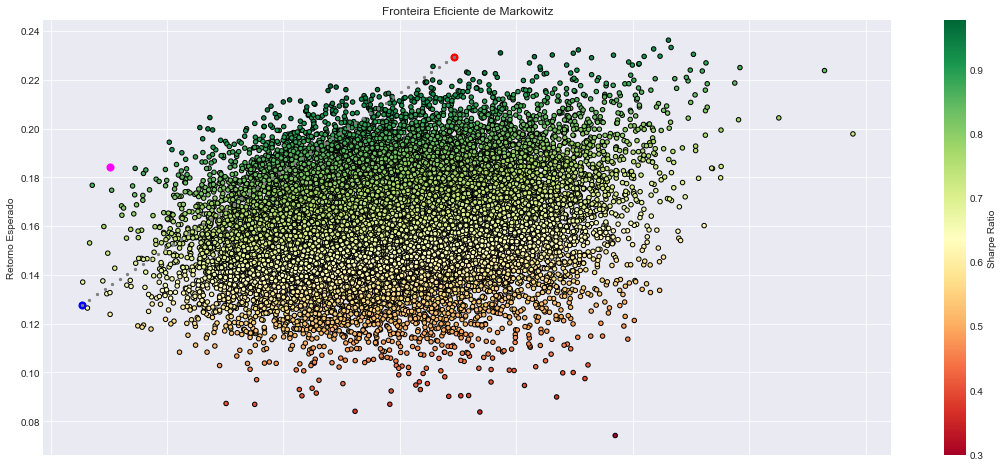

In [12]:
# Geração da imagem da fronteira eficiente

plt.style.use('seaborn-dark')
carteira.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(19, 8), grid=True)

plt.scatter(x=carteira_sharpe['Volatilidade'], y=carteira_sharpe['Retorno'], c='red', marker='o', s=50)
plt.scatter(x=carteira_min_variancia['Volatilidade'], y=carteira_min_variancia['Retorno'], c='blue', marker='o', s=50 )
plt.scatter(x=carteira_tang['Volatilidade'], y=carteira_tang['Retorno'], c='magenta', marker='o', s=50 )

plt.scatter(x, y, s=5, color='gray')
plt.ylabel('Retorno Esperado')
plt.xlabel('Volatilidade')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

In [13]:
# Reajustando o porfolio para o numero de ativos desejado

def best_weights(carteira, k=7):
    aux = carteira.iloc[: , 3:].T.sort_values(by=[float(carteira.index[0])], ascending=False)
    best_weights0 = aux[0:k]
    best_weights0 = best_weights0/float(aux[0:k].sum())
    best_weights0 = best_weights0.T
    return best_weights0

In [14]:
# Chamando a função que realiza o reajustante, passando como parametro o numero de ativos

best_weights_tang = best_weights(carteira_tang, 5)
best_weights_sharpe = best_weights(carteira_sharpe, 5)
best_weights_min_variancia = best_weights(carteira_min_variancia, 5)

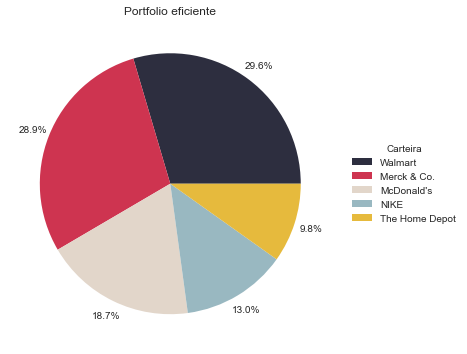

In [15]:
# Geração do grafico que apresenta o portfolio eficiente

labels = best_weights_tang.columns
labels = labels.tolist()
weights = best_weights_tang.values
weights = weights[0]

cores_grafico = ['#2d2e3f', '#ce3450', '#e2d6ca', '#99b8c1', '#e6ba3d']
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="auto"))
ax.pie(weights, autopct='%.1f%%', pctdistance=1.13, colors=cores_grafico, normalize=False)
ax.legend(labels, title="Carteira", loc="center left",bbox_to_anchor=(1.03, 0, 1, 1))
ax.set_title("Portfolio eficiente")
plt.savefig("Portfolio_eficiente.jpg")

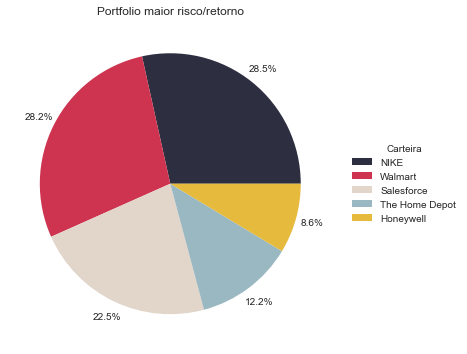

In [16]:
# Geração do grafico que apresenta o portfolio com maior risco/retorno

labels = best_weights_sharpe.columns
labels = labels.tolist()
weights = best_weights_sharpe.values
weights = weights[0]

cores_grafico = ['#2d2e3f', '#ce3450', '#e2d6ca', '#99b8c1', '#e6ba3d']
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="auto"))
ax.pie(weights, autopct='%.1f%%', pctdistance=1.13, colors=cores_grafico, normalize=False)
ax.legend(labels, title="Carteira", loc="center left",bbox_to_anchor=(1.03, 0, 1, 1))
ax.set_title("Portfolio maior risco/retorno")
plt.savefig("Portfolio_maior.jpg")

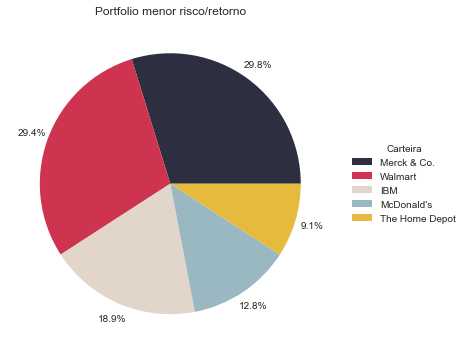

In [17]:
# Geração do grafico que apresenta o portfolio com menor risco/retorno

labels = best_weights_min_variancia.columns
labels = labels.tolist()
weights = best_weights_min_variancia.values
weights = weights[0]

cores_grafico = ['#2d2e3f', '#ce3450', '#e2d6ca', '#99b8c1', '#e6ba3d']
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="auto"))
ax.pie(weights, autopct='%.1f%%', pctdistance=1.13, colors=cores_grafico, normalize=False)
ax.legend(labels, title="Carteira", loc="center left",bbox_to_anchor=(1.03, 0, 1, 1))
ax.set_title("Portfolio menor risco/retorno")
plt.savefig("Portfolio_menor.jpg")

In [18]:
# Função que realiza a validação do modelo, calculando o retorno da carteira ao longo do tempo

def perfomance_carteira(pf, headers, weights):
    wallet = []
    for aux in range (len(headers)):
        try:
            w = float(weights[headers[aux]])
        except:
            w = 0
        temp = np.array((pf[headers[aux]].pct_change()*w).cumsum())
        if aux > 0:
            wallet += temp
        else:
            wallet = temp
    return np.nan_to_num(wallet)

In [19]:
# Validação das carteiras projetadas

wallet1 = perfomance_carteira(prices_df2, prices_df2.columns, best_weights_min_variancia)
wallet2 = perfomance_carteira(prices_df2, prices_df2.columns, best_weights_tang)
wallet3 = perfomance_carteira(prices_df2, prices_df2.columns, best_weights_sharpe)

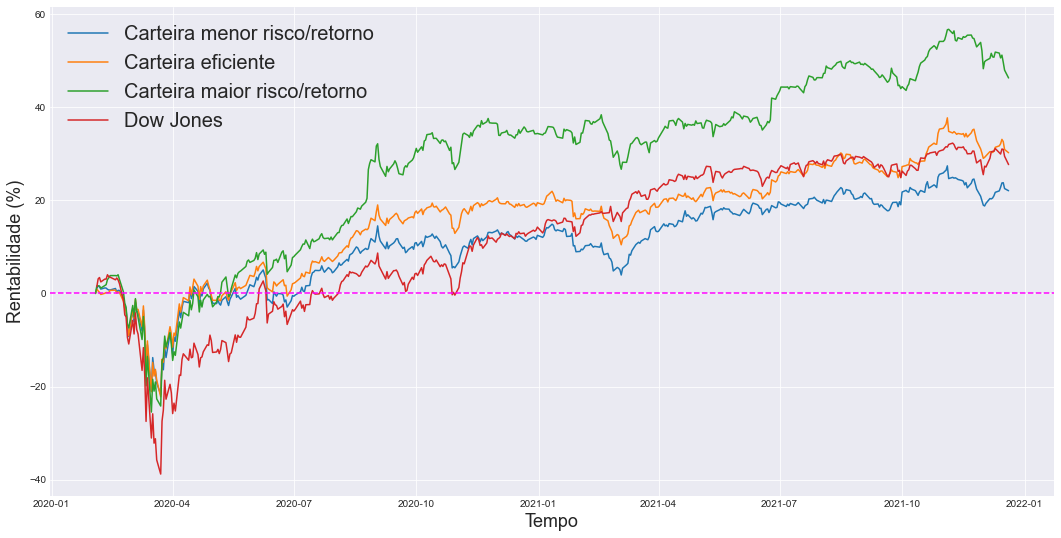

In [20]:
# Apresentação de resultados, com uma validação historica do modelo, a partir de uma data definida apos o periodo de treinamento

index = benchmark.index

plt.figure(figsize=(18,9))
plt.plot(index, np.array(wallet1*100))
plt.plot(index, np.array(wallet2*100))
plt.plot(index, np.array(wallet3*100))
plt.plot(index, np.array(benchmark.pct_change().cumsum()*100))

plt.xlabel("Tempo", fontsize=18)
plt.ylabel("Rentabilidade (%)", fontsize=18)
plt.grid()
plt.axhline(0, linestyle='--', color='magenta')

plt.legend(['Carteira menor risco/retorno','Carteira eficiente','Carteira maior risco/retorno','Dow Jones'], loc='best', fontsize=20)

plt.show()